In [85]:
import vip_ivp as vip

vip.new_system()
# Parameters
initial_height = 1  # m
GRAVITY = -9.81
k = 0.7  # Bouncing coefficient
v_min = 0.01  # Minimum velocity need to bounce


In [86]:
# Create the system
acceleration = vip.create_source(GRAVITY)
velocity = vip.integrate(acceleration, x0=0)

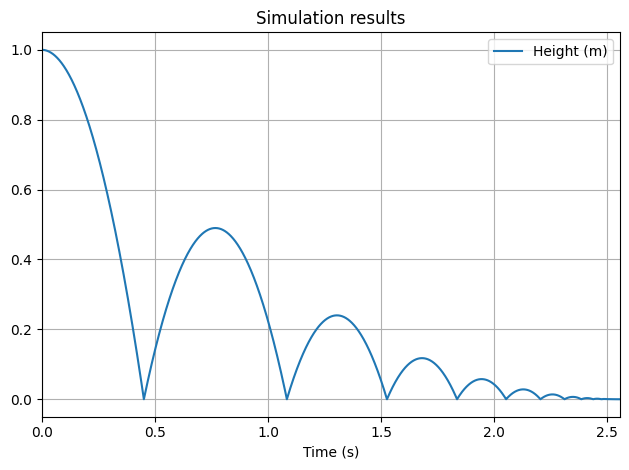

In [87]:
height = vip.integrate(velocity, x0=initial_height)
# Create the bouncing event
bounce = vip.where(abs(velocity) > v_min, velocity.action_reset_to(-k * velocity), vip.terminate)
height.on_crossing(0, bounce, terminal=False, direction="falling")

# Add variables to plot
height.to_plot("Height (m)")

# Solve the system
vip.solve(20, time_step=0.001)